# REGRESSION
Many Engineering and Scientific problems are concerned with determining a relationship between a set of variables. Knowledge of such relationship would enable us to predict the value of the dependent variable (variable of interest) given the set of independent variables which has a relationship with it.


# 1. Linear Regression

In many situations, there is a single response variable $\boxed{y}$, also called the dependent variable, which depends on the value of set of inputs, also called independent variables $ \boxed{x_1, x_2, _.... _,x_n} $.



The simplest type of relationship between the dependent variable $y$ and the input variable $ \boxed{ \ x_1,\ x_2 \ ...\ x_n }$ is a linear relationship. 

That is, for some constants $ \boxed{\theta_0, \ \theta_1, \ ... \ \theta_n} $

### Liner Regression Equation
$$\boxed{ \hat y = \theta_0 + \theta_1 x_1 +\theta_2 x_2  ...  + \theta_n x_n +\epsilon }$$ 

Where
* $\hat y$ is the predicted value.  
* $n$ is the number of features.  
* $x_i$ is the $ i^{th} $ feature value.  
* $\theta_j$ is the $j^{th} $ modelparameter.  
* $\epsilon$ is the random error.



### Liner Regression Model predction

$$ \boxed{\hat y = h_\theta (x) = \theta \cdot x }$$

Where
* $\theta$ is the models parameter vector, containing the bias term $\theta_0$ and the features weights $\theta_1$ to $\theta_n$
* $x$ is the istance feature vector, containing $x_0$ to $x_n$, with $x_0 = 1$  
* $\theta \cdot x $ is the dot product
* $h_\theta $ is the hypothesis function

## Okay, now how do find the the parameteres i.e. $\theta$ value
The process ofcalculating the parameters from the data is called training the model. For this purpose we first need a measure of how well (or poorly) the model fits the training data using a performance measure. The most common performance measure for Linear Regression is **Root Mean Square Error (RMSE)**. Therefore, to train a linear regression model, we need to find the value of $\theta$ that minimise **Mean Square Error (MSE)** than the RMSE, and it leads to same result. 


### Mean Square Error (MSE)
$$ \boxed{MSE(X,h_\theta) = \frac{1}{m} \sum^m_{i=1} (\theta^T x^i - y^i)^2} $$
The MSE is the cost function for linear regression

### Root Mean Square Error (RMSE)
$$ \boxed{RMSE(X,h_\theta) = \sqrt{ \frac{1}{m} \sum^m_{i=1} (\theta^T x^i - y^i)^2}} $$
The MSE is the cost function for linear regression

### The Normal equation
To find the value of $\theta$ that minimises the cost function, there is a mathematical equation that gives the result directly. This is called Normal equation.


$$ \boxed{ \hat\theta =(X^T X)^{-1} X^T y }$$

Where
* $\hat \theta$ is the value of $\theta$ that minimises the cost function.
* $y$ is the vector of the target values containing $ y_1$ to $y_m$

## Lets generate some linear looking data to test these equations

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
# take m=100 i.e. 100 instances
X = 2 * np.random.rand(100,1) #x-axis
y = 4 + 3 * X + np.random.rand(100,1) #y-axis 
# dependent variable on y-axis has intercept=4, slope=3, eta=np.random.rand(100,1)
# where eta is the noise added to line

In [4]:
#plot the data
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("X -> indipendent values")
plt.ylabel("y -> dependent values")
plt.title("Data points")

Text(0.5, 1.0, 'Data points')

#### Now lets compute $\boxed{\hat\theta}$ using the normal equation

In [5]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
print ("First 5 values of X_b")
X_b[:5]

First 5 values of X_b


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

the above line of code finds the $\boxed{\hat\theta}$ i.e. theta_best
$$ \hat\theta =(X^T X)^{-1} X^T y $$

In [7]:
theta_best

array([[4.51359766],
       [2.98323418]])


$\hat \theta$ has 2 values.   
$ \theta_0 =4.49238752 $ and    
$ \theta_1=3.00855602$ 

We would have hoped for $\theta_0=4$ and $ \theta_1=3$

### Now we can make predictions using $\boxed{\hat\theta}$

In [8]:
X_new = np.array([[0],[2]]) #2 new instances
X_new

array([[0],
       [2]])

In [9]:
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
# predict using the theta_best
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

The above code is 

$\hat y = h_\theta(x)=\theta^TX $

which gives the predicted value for X=[0,2]



### Lets plot the models prediction

Text(0.5, 1.0, ' Fitted Linear Regression line on data points ')

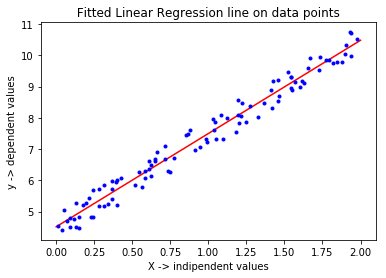

In [11]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,"b.")
plt.xlabel("X -> indipendent values")
plt.ylabel("y -> dependent values")
plt.title(" Fitted Linear Regression line on data points ")

## Linear Regression using Scikit-Learn

In [12]:
from sklearn.linear_model import LinearRegression #Scikit-Learn library is refered as sklearn

In [13]:
lin_reg =LinearRegression()

In [14]:
lin_reg.fit(X,y) # train the model with X instances on y labels

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print("Linear Regression\n intercept = {}\n coefficients = {}".format(lin_reg.intercept_,lin_reg.coef_))

Linear Regression
 intercept = [4.51359766]
 coefficients = [[2.98323418]]


In [16]:
lin_reg.predict(X_new) #predict on new data using learned liner regression

array([[ 4.51359766],
       [10.48006601]])

The LinearRegression class is based on least squares

# 2. Polynomial Regression

#### What if the data is more complex than a simple straight line????????? 

Surprisingly, we can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each featue as a new features, then train a linear model on this extended set of features.



### Lets generate some nonlinear data, based on simple quadratic equation plus some noise

In [17]:
m=100
X = 6 * np.random.rand(m,1) - 3 # independent values x-axis

In [18]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

the above code is 

$ y = 0.5  X^2 + X +2 +\epsilon$

i.e. qadratic equation $ ax^2 +bx +c$

### Lets plot 

Text(0.5, 1.0, ' Nonlinear Data ')

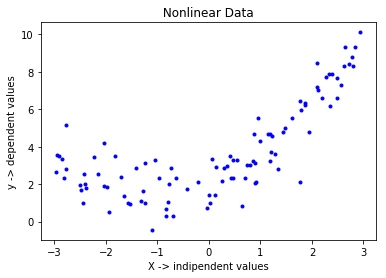

In [19]:
plt.plot(X,y,"b.")
plt.xlabel("X -> indipendent values")
plt.ylabel("y -> dependent values")
plt.title(" Nonlinear Data ")

Clearly a straight line will never fit this data properly.

So lets do polynomial regression on this data i.e. nothing but create new second degree features of the existing features and train model using both features.

we will use **Scikit-Learn's PolynomialFeatures** class to transform our training data 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# new features of degree = 2 

In [22]:
X_poly = poly_features.fit_transform(X) 

In [23]:
print("old data point = {}\n new data point ={}"
      .format(X[0],X_poly[0]))

old data point = [0.85218988]
 new data point =[0.85218988 0.72622759]


## Now train linear regression model on new data

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # training
print(" Polynomial Linear Regression\n intercept = {}\n coefficients = {}".format(lin_reg.intercept_,lin_reg.coef_))

 Polynomial Linear Regression
 intercept = [2.03442356]
 coefficients = [[1.04798249 0.50985053]]


The equation obtained is  
$\hat y = 0.52 X^2 + 1.04 X + 1.89 $

In [25]:
# prediction of X instances
poly_reg_predictions = lin_reg.predict(X_poly)

### Plot the polynomial regression line on data

In [26]:
x_axis=[]
y_axis=[]
for x in range(len(X)):
    x_axis.append(X[x][0])
    y_axis.append(poly_reg_predictions[x][0])

In [27]:
# sort the coordinates  as per x axis
sorted_x_y= sorted(zip(x_axis,y_axis))
sorted_x_y[:5]

[(-2.969630496922688, 3.418524381951772),
 (-2.944817690300222, 3.3697051336349024),
 (-2.9072603008267954, 3.2970051975847396),
 (-2.854104201411277, 3.196569284950589),
 (-2.8169985003657034, 3.128167439294386)]

In [28]:
x_axis=[]
y_axis=[]
for x in range(len(sorted_x_y)):
    x_axis.append(sorted_x_y[x][0])
    y_axis.append(sorted_x_y[x][1])

<Figure size 432x720 with 0 Axes>

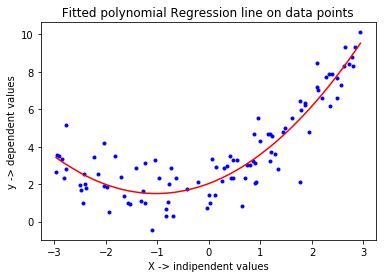

<Figure size 432x720 with 0 Axes>

In [29]:
plt.plot(X,y,"b.")
plt.plot(x_axis,y_axis,"r-")
plt.xlabel("X -> indipendent values")
plt.ylabel("y -> dependent values")
plt.title(" Fitted polynomial Regression line on data points ")
plt.figure(figsize=[6,10])

The red colour shows the polynomial regression prediction

# Learning Curves

If we perform high degree Polynomial Regression, the model will likely fit the training data much better.

We wil perform 2,300,500 degree polynominal regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_reg_d_1, lin_reg_d_2, lin_reg_d_300, lin_reg_d_500 = LinearRegression(),LinearRegression(),LinearRegression(),LinearRegression()
poly_features_d_2 =PolynomialFeatures(degree=2, include_bias= False)
poly_features_d_300 =PolynomialFeatures(degree=15, include_bias= False)
poly_features_d_500 =PolynomialFeatures(degree=25, include_bias= False)

In [31]:
X_d_2 = poly_features_d_2.fit_transform(X) 
X_d_300 = poly_features_d_300.fit_transform(X)
X_d_500 = poly_features_d_500.fit_transform(X)

In [32]:
lin_reg_d_1.fit(X,y)
lin_reg_d_2.fit(X_d_2,y)
lin_reg_d_300.fit(X_d_300,y)
lin_reg_d_500.fit(X_d_500,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
prediction_d_1 = lin_reg_d_1.predict(X)
prediction_d_2 = lin_reg_d_2.predict(X_d_2)
prediction_d_300 = lin_reg_d_300.predict(X_d_300)
prediction_d_500 = lin_reg_d_500.predict(X_d_500)

### Plot the polynomial regression line on data

In [34]:
x_axis=[]
y_axis_d1, y_axis_d2, y_axis_d300, y_axis_d500 = [],[],[],[]
for x in range(len(X)):
    x_axis.append(X[x][0])
    y_axis_d1.append(prediction_d_1[x][0])
    y_axis_d2.append(prediction_d_2[x][0])
    y_axis_d300.append(prediction_d_300[x][0])
    y_axis_d500.append(prediction_d_500[x][0])

In [35]:
# sort the coordinates  as per x axis
sorted_x_y= sorted(zip(x_axis,y_axis_d1,y_axis_d2,y_axis_d300,y_axis_d500))
sorted_x_y[0]

(-2.969630496922688,
 0.6228681374699558,
 3.418524381951772,
 2.6654683719145362,
 2.465586288669213)

In [36]:
x_axis=[]
y_axis_d1, y_axis_d2, y_axis_d300, y_axis_d500 = [],[],[],[]
for x in range(len(sorted_x_y)):
    x_axis.append(sorted_x_y[x][0])
    y_axis_d1.append(sorted_x_y[x][1])
    y_axis_d2.append(sorted_x_y[x][2])
    y_axis_d300.append(sorted_x_y[x][3])
    y_axis_d500.append(sorted_x_y[x][4])

<Figure size 432x720 with 0 Axes>

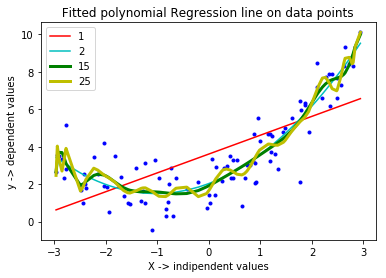

<Figure size 432x720 with 0 Axes>

In [37]:
plt.plot(X,y,"b.")
plt.plot(x_axis,y_axis_d1,"r",label="1")
plt.plot(x_axis,y_axis_d2,"c",label="2")
plt.plot(x_axis,y_axis_d300,"g",label="15",linewidth=3)
plt.plot(x_axis,y_axis_d500,"y",label="25", linewidth=3)
plt.xlabel("X -> indipendent values")
plt.ylabel("y -> dependent values")
plt.title(" Fitted polynomial Regression line on data points ")
plt.legend()
plt.figure(figsize=[6,10])

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=3)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-+", linewidth=3, label="validation")
    plt.legend()
    plt.ylabel("MSE")
    plt.xlabel("Number of Instances")
    plt.show()


    

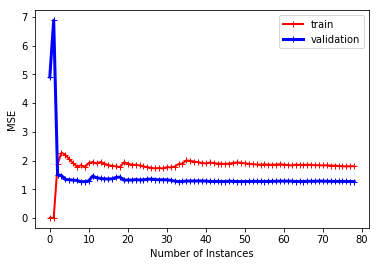

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [41]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)